# Statistical non-Parametric Mapping (SnPM) t test

This notebook describes a non-parametric t-test using **spm1d**. For additional details refer to the documentation at [spm1d.org](http://www.spm1d.org)

____________
## Step 1:  Load the data & rename variables

Following the previous notebook (SPM t test), let's load the data and rename the variables.

In [1]:
load('Warmenhoven2018-bow-force.mat');

yA = Pin_Force_Bow_Male';   %(10 x 51) array
yB = Pin_Force_Bow_Female'; %(10 x 51) array

____________
## Step 2:  Conduct t test

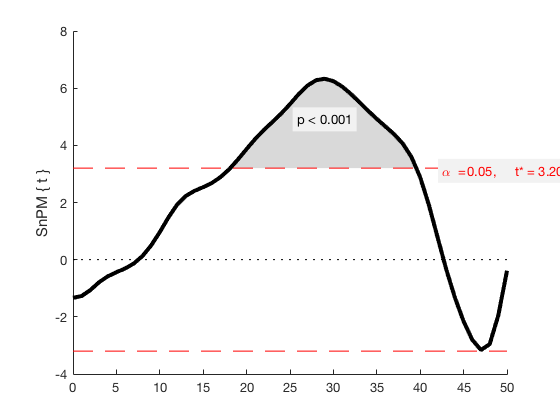

In [2]:
snpm  = spm1d.stats.nonparam.ttest2(yA, yB);
snpmi = snpm.inference(0.05, 'iterations', 10000, 'two_tailed', true);

snpmi.plot();
snpmi.plot_threshold_label(); 
snpmi.plot_p_values();

These results are qualitatively identical to the parametric results in the previous notebook.  The code is nearly the same too, with two exceptions:

* The **ttest2** function used for non-parametric testing is found in the "nonparam" folder: ./+spm1d/+stats/+nonparam/ttest2.m

* A value for "iterations" is needed for non-parametric inference.

To explain the meaning of "iterations" let's first consider the the attributes of the **snpm** variable:

In [3]:
disp(snpm)


SnPM{t} (1D)
              z: [1×51 double]
    nPermUnique: 184756



Like before the **z** attribute contains the test statistic continuum. There is a new attribute:

* **nPermUnique**: the number of unique permutations possible for (non-parametric) permutation testing. Continuum-level permutation testing is described in [Nichols & Holmes (2003)](https://doi.org/10.1002/hbm.1058) for 3D data and in [Pataky et al. 2015](https://doi.org/10.1016/j.jbiomech.2015.02.051) for 1D data. Basically, each observation is assigned a group label ("A" or "B"), then the labels are randomly permuted and the test statistic continuum is re-calculated and its maximum value is saved. This random permutation process is repeated *N* times, yielding a distribution of *N* maximum t values, and the critical test statistic value can be computed directly from this distribution.  Note that the distribution of maximum t values produced by this non-parametric permutation procedure will converge to the parametric distribution (from Random Field Theory) when the data are normally distributed.

The "iterations" argument in the **inference** method is *N*, or the number of random permutations to test.  Setting "iterations" to -1 will run through all of the unique permutations, but usually *N*=10,000 is sufficient to achieve numerical stability.

The output from **inference** contains some additional attributes:

In [4]:
disp(snpmi)


SnPM{t} inference (1D)
              z: [1×51 double]
    nPermUnique: 184756
    nPermActual: 10000
          alpha: 0.0500
          zstar: 3.2015
       h0reject: 1
              p: 1.0000e-04



Identical to parametric inference, the Type I error rate **alpha**, the critical threshold **zstar**, the null hyothesis rejection decision **h0reject**, and cluster-specific probablity values **p** are also attributes of non-parametric inference. The only new attribute is:

* **nPermActual**:  the actual number of permutations performed. Its maximum possible value is **nPermUnique**.